# 项目：可视化帕默群岛企鹅数据

## 分析目标

此数据分析报告的目的是对帕默群岛上企鹅样本的相关变量进行**可视化**，从而探索和分析**种类**、**性别**、**所在岛屿**等因素，与企鹅的身体属性，包括体重、嘴峰长度和深度、鳍的长度，之间的关系。

## 简介

原始数据`Penguins.csv`包括334个收集自南极洲帕尔默群岛的3个岛屿上的企鹅样本，以及企鹅相关属性数据，包括种类名、所在岛、嘴峰长度、嘴峰深度、鳍长度、体重、性别。

`Penguins.csv`每列的含义如下：
- species：企鹅的种类
- island：企鹅所在岛
- culmen_length_mm：企鹅嘴峰的长度（单位为毫米）
- culmen_depth_mm：企鹅嘴峰的深度（单位为毫米）
- flipper_length_mm：企鹅鳍的长度（单位为毫米）
- body_mass_g：企鹅体重（单位为克）
- sex：企鹅性别

### 准备：

In [3]:
import numpy as py
import pandas as pd

## 一、读取文件

>读取CSV文件，penguins.csv命名为original_penguins

In [4]:
original_penguins=pd.read_csv('penguins.csv')

## 二、评估数据

在这一部分中，我们将对在上一部分建立的original_temperature所包含的数据进行评估\
主要从两个方面进行：结构和内容，即整齐度和干净度。\
数据的结构性问题指不符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”这三个标准；\
数据的内容性问题包括存在丢失数据、重复数据、无效数据等。

>为了区分开经过清理的数据和原始的数据
>我们创建新的变量cleaned_penguins，让它为original_penguins复制出的副本

In [5]:
cleaned_penguins=original_penguins.copy()

In [6]:
original_penguins.sample(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
32,Adelie,Dream,39.5,17.8,188.0,3300.0,FEMALE
156,Chinstrap,Dream,52.7,19.8,197.0,3725.0,MALE
271,Gentoo,Biscoe,48.5,14.1,220.0,5300.0,MALE
26,Adelie,Biscoe,40.6,18.6,183.0,3550.0,MALE
99,Adelie,Dream,43.2,18.5,192.0,4100.0,MALE
316,Gentoo,Biscoe,49.4,15.8,216.0,4925.0,MALE
197,Chinstrap,Dream,50.8,18.5,201.0,4450.0,MALE
228,Gentoo,Biscoe,43.3,13.4,209.0,4400.0,FEMALE
337,Gentoo,Biscoe,48.8,16.2,222.0,6000.0,MALE


从抽样的10行数据来看，original_penguins中的数据符合“每行是一个观察值，每列是一个变量”\

具体来看，每行是关于企鹅员的具体信息，每列企鹅员相关的各个变量\
。因此，originalpenguinss不存在结构性问题。

### 2.1 缺失数据

从输出结构来看，数据共有344条观察值，而`cleaned_penguins`中的`culmen_length_mm`,`culmen_depth_mm`,`flipper_length_mmbody_mass_g`,`body_mass_g,sex`变量中存在缺失值，将在后续进行评估。

数据类型方面，我们已知species（企鹅种类）sex（企鹅性别）、island（企鹅所在岛）都是分类数据，因此可以把数据类型都转换为Category。

#### 处理数据类型：

In [15]:
cleaned_penguins['species'] = cleaned_penguins['species'].astype("category")
cleaned_penguins['sex'] = cleaned_penguins['sex'].astype("category")
cleaned_penguins['island'] = cleaned_penguins['island'].astype("category")
cleaned_penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    category
 2   culmen_length_mm   342 non-null    float64 
 3   culmen_depth_mm    342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                334 non-null    category
dtypes: category(3), float64(4)
memory usage: 12.3 KB


>先提取culmen_length_mm变量缺失的观察值

In [7]:
cleaned_penguins[(cleaned_penguins['culmen_length_mm'].isnull())&(cleaned_penguins['culmen_depth_mm'].notnull())&(cleaned_penguins['body_mass_g'].notnull())]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


In [8]:
cleaned_penguins[(cleaned_penguins['culmen_depth_mm'].isnull())&(cleaned_penguins['flipper_length_mm'].notnull())&(cleaned_penguins['flipper_length_mm'].notnull())]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


从上述可知，`culmen_length_mm`缺失的同时，`culmen_depth_mm`,`flipper_length_mm`,`body_mass_g`以及`flipper_length_mm`一并缺失。\
也就是说，这些观察值缺失了有关企鹅的身体属性，对后面进行探索企鹅的身体属性与相关因素没有任何价值，因此这些观察值应该删除。

>再提取sex变量缺失的观察值

In [9]:
cleaned_penguins[cleaned_penguins['sex'].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [10]:
cleaned_penguins[(cleaned_penguins['sex'].isnull())&(cleaned_penguins['culmen_length_mm'].notnull())]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN


从上述可知，缺失`sex`的这些观察值，仍旧包含了其他变量，仍然可以进行后续的数据分析，因此可以保留这些观察值

#### 处理缺失数据：

>由于缺失分析所需的核心数据culmen_length_mm等有关企鹅的身体属性的变量，我们将把这些观察值删除，并查看删除后该列空缺值个数和：

In [18]:
cleaned_penguins=cleaned_penguins.dropna(subset='culmen_length_mm')
cleaned_penguins['culmen_length_mm'].isnull().sum()

0

### 2.2 重复数据

根据数据变量的含义以及内容来看，允许变量重复，我们不需要对此数据检查是否存在重复值。

### 2.3 不一致数据

不一致数据可能存在于`species`,`island`,`sex`中，我们要查看是否存在不同值实际指代同一目标的情况。

In [11]:
cleaned_penguins['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

从上面看出，species列里并不存在不一致数据，各个值都在指代不同的企鹅种类。

In [12]:
cleaned_penguins['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

从上面看出，island列里并不存在不一致数据，各个值都在指代不同的企鹅所在岛。

In [13]:
cleaned_penguins['sex'].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

从上面看出，sex列里并不存在不一致数据,但是存在一个英文句号值，并不代表任何有效性别，我们应当把该值替换为NaN空值。

#### 处理不一致数据：

In [22]:
cleaned_penguins['sex']=cleaned_penguins['sex'].replace('.','NaN')
cleaned_penguins['sex'].value_counts()

sex
MALE      168
FEMALE    165
NaN         1
Name: count, dtype: int64

### 2.4 无效或错误数据

In [14]:
cleaned_penguins.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


从以上统计信息来看，cleaned_penguins里不存在脱离现实意义的数值。

## 四、数据探索

我们将通过数据可视化，进行探索和分析，从图表中获得企鹅样本数量的相关洞察。

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

>设置色盘：

In [8]:
sns.set_palette('pastel')

In [9]:
cleaned_penguins

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


## 分类变量

`species`,`island`,`sex`都是分类变量，可以绘制饼图

### 企鹅的种类比例

>统计各种种类的企鹅有多少只?

In [62]:
#species_count:企鹅的各个种类的数量
species_count=cleaned_penguins['species'].value_counts()

In [70]:
species_count

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

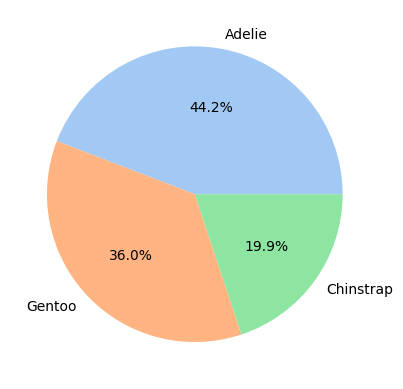

In [69]:
plt.pie(species_count,autopct='%.1f%%',labels=species_count.index)
plt.show()

样本中`Adelie`这个种类的企鹅占比最大，`Gentoo`种类的占比次之，`Chinstrap`的占比最小，为$\dfrac{1}{5}$左右

### 企鹅的所在岛的比例

>统计各个岛的企鹅数量？

In [75]:
#island_coun:各个岛的企鹅的数量
island_count=cleaned_penguins['island'].value_counts()

In [80]:
island_count

island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64

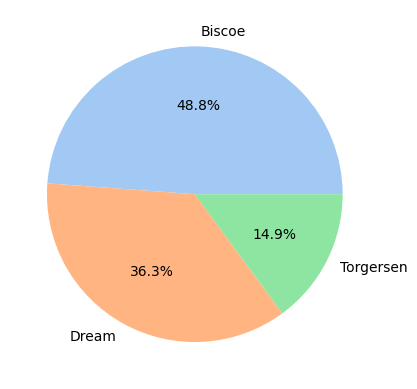

In [79]:
plt.pie(island_count,labels=island_count.index,autopct='%.1f%%')
plt.show()

样本中一半左右的企鹅样本都来自`Biscoe`，占比最大，其次是`Dream`岛屿，来自`Torgersen`岛屿的样本数量最少。

### 企鹅的性别的比例

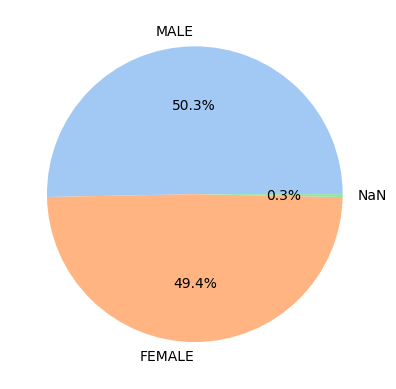

In [85]:
sex_count=cleaned_penguins['sex'].value_counts()
plt.pie(sex_count,labels=sex_count.index,autopct='%.1f%%')
plt.show()

样本企鹅的性别占比持平，符合随机抽样

### 不同岛屿的企鹅种类的数量

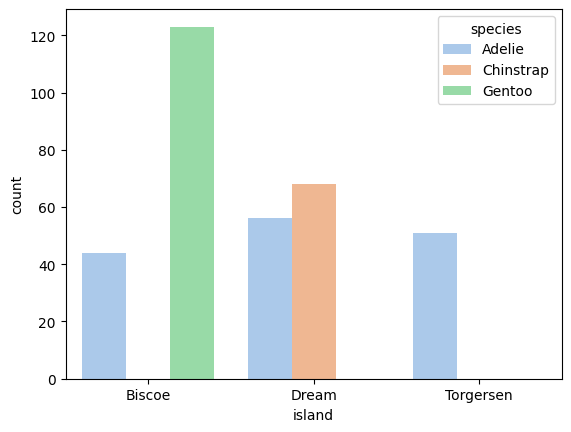

In [90]:
#使用计数图
sns.countplot(cleaned_penguins,x='island',hue='species')
plt.show()

In [91]:
species_count

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

In [92]:
island_count

island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64

样本数量中，在`Biscoe`岛屿发现了`Gentoo`和`Adelie`，但是`Gentoo`种类的企鹅最多；在`Dream`岛屿上，发现有`Adelie`和`Chinstrap`种类的企鹅，这两种种类的企鹅数量相差无几，`Chinstrap`略高于`Adelie`；在`Torgersen`岛屿只发现了`Adelie`。其中，`Adelie`遍布三个岛屿，而`Gentoo`和`Chinstrap`分别只存在于`Biscoe`和`Torgersen`。

### 不同岛屿的企鹅性别的数量

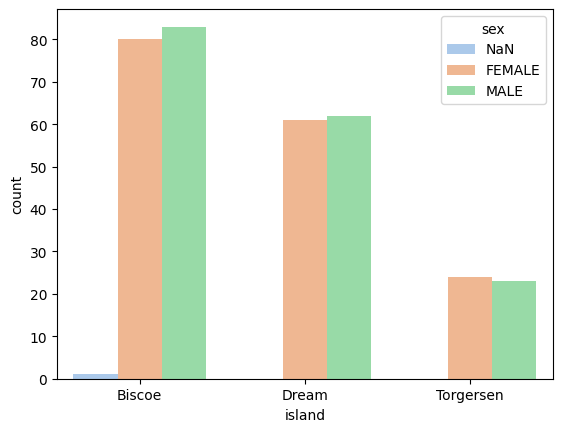

In [97]:
sns.countplot(cleaned_penguins,x='island',hue='sex')
plt.show()

样本数量中，`Biscoe`岛屿、`Dream`岛屿、`Torgersen`岛屿发现的企鹅的性别数量基本持平。

## 数值变量

### 查看数值之间的相关关系

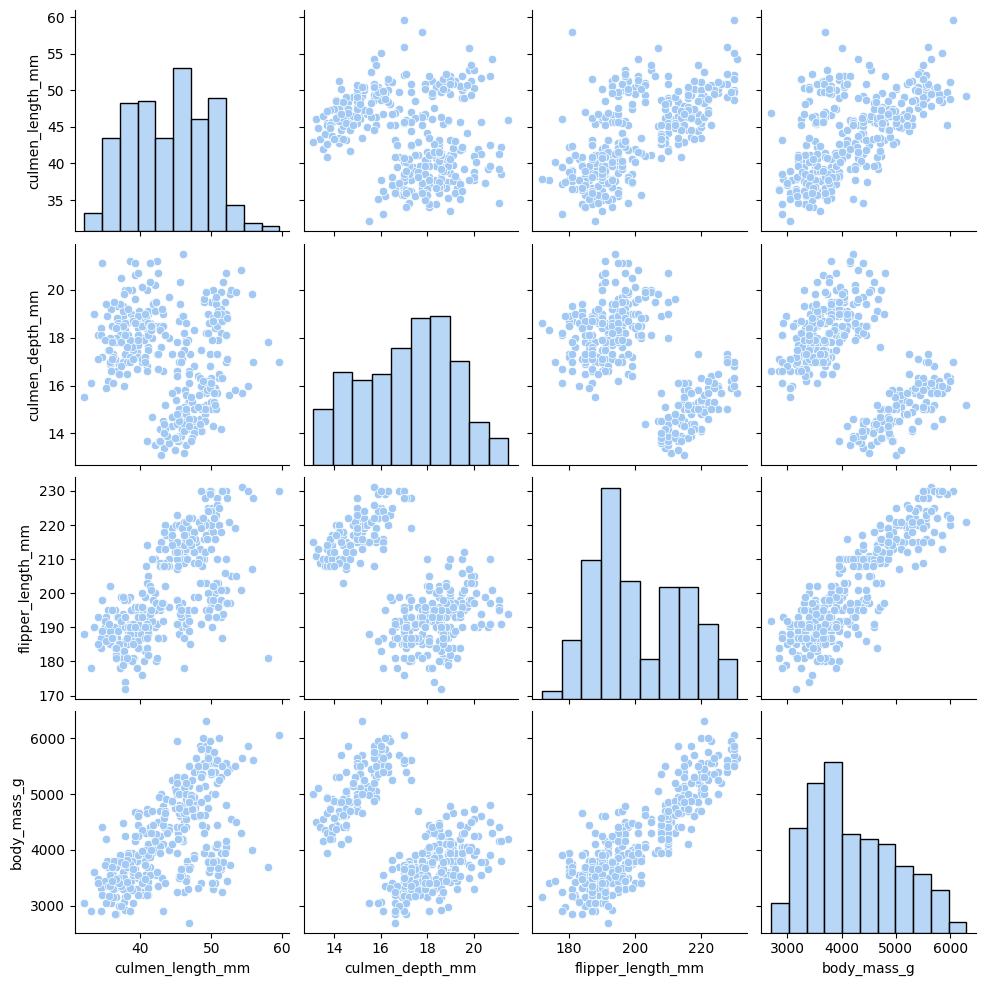

In [98]:
sns.pairplot(cleaned_penguins)
plt.show()

从直方图来看，企鹅样本的嘴峰长度、嘴峰深度、鳍长度、体重的分布不是正态分布。一方面说明，这里面可能包含了多组存在差异的样本数据，另一方面也说明样本数不够大。

另外可以在散点图中看出明显的多个集群，可能与某些因素有关，比如企鹅种类、性别，因此可以对对比进行进一步的分类。

### 根据种类查看数值之间的相关关系

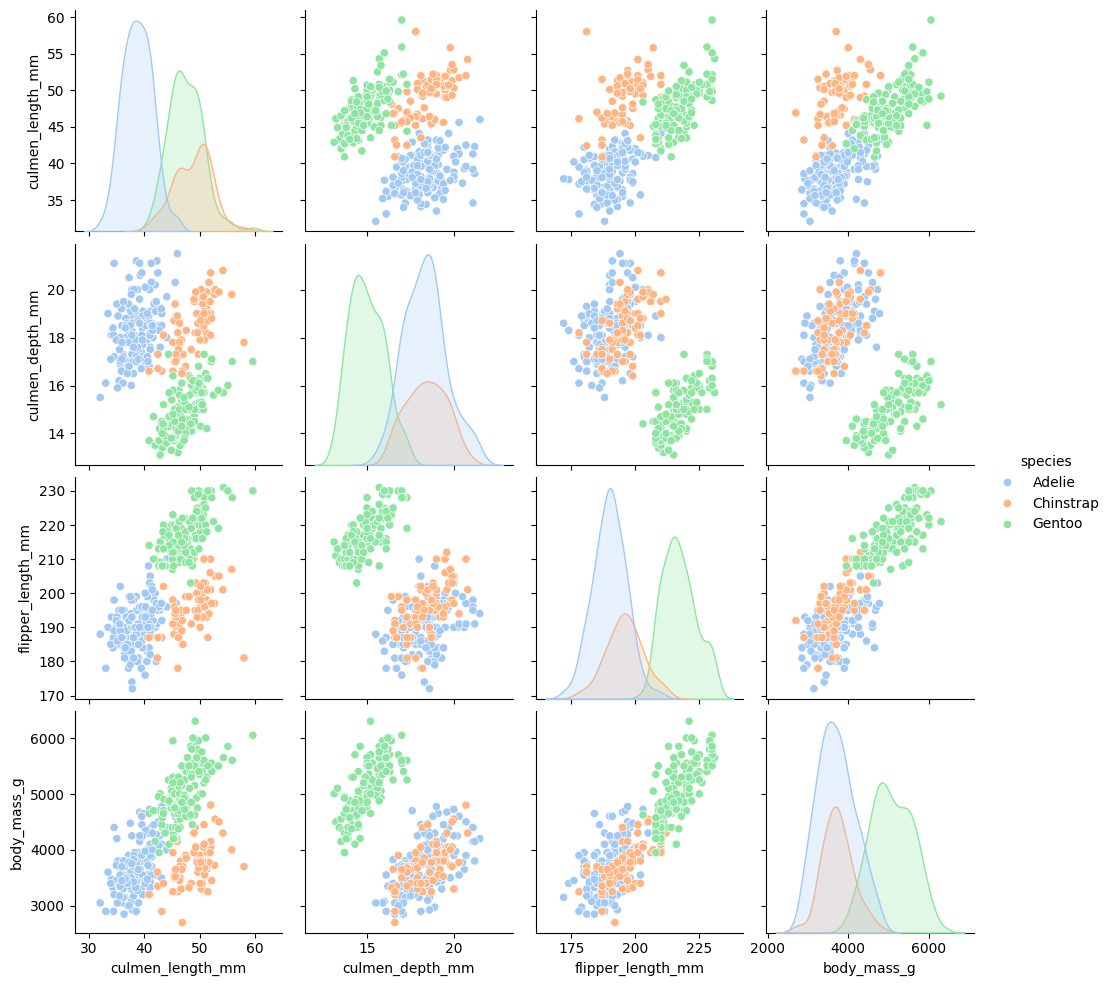

In [10]:
sns.pairplot(cleaned_penguins,hue='species')
plt.show()

同一种类的企鹅样本数据，在散点图上基本都聚在一起，说明同一种类的企鹅在嘴峰长度、嘴峰深度、鳍长度、体重之间关系上，存在相似性。这些发现有利于我们根据体重、鳍长等数值推测企鹅种类，也可以根据企鹅种类推测体重、鳍长等数值。

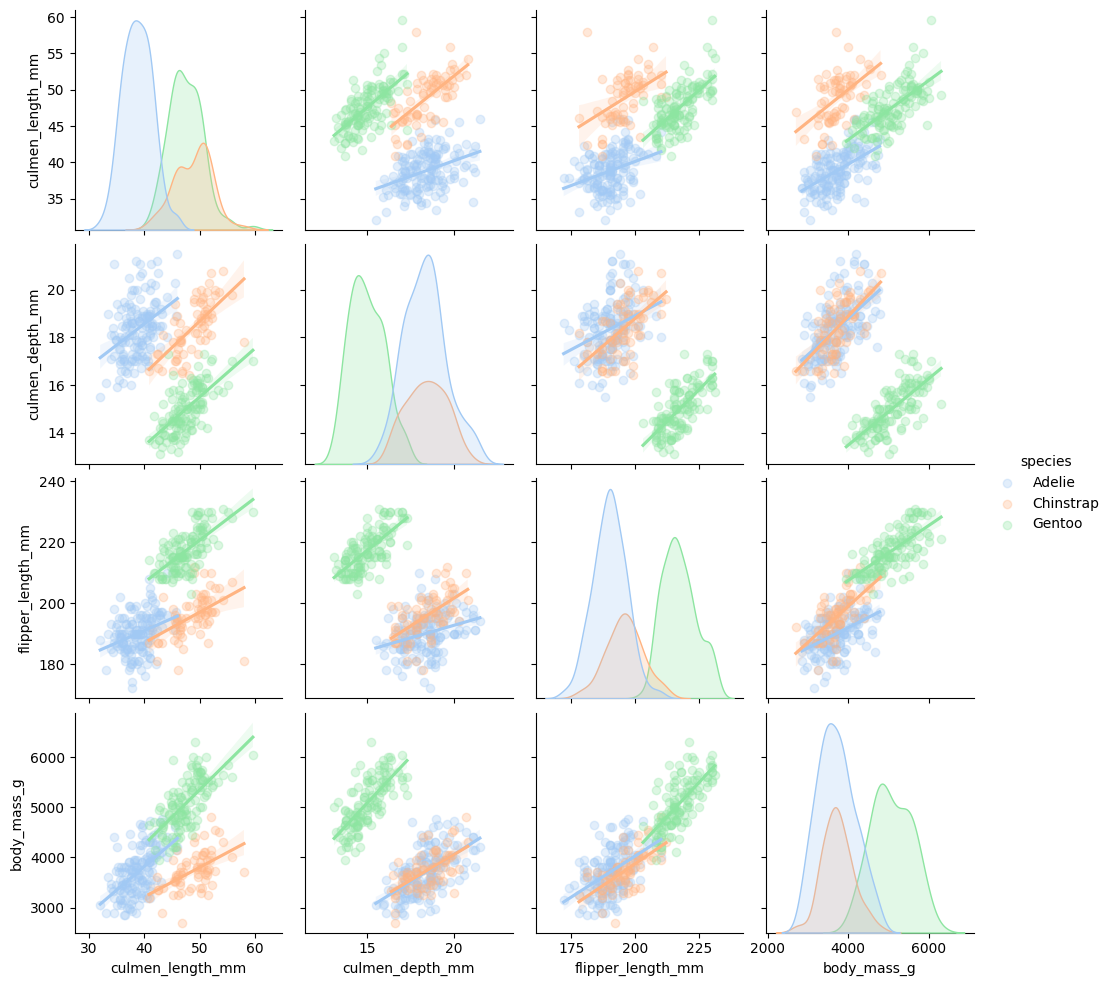

In [15]:
#添加kind（可选变量）：re表示回归线，能够大致表示散点的趋势。
#plot_kws调整图上的具体参数
#scatter_kws表示散点图，alpha表示透明度
sns.pairplot(cleaned_penguins,hue='species',kind='reg',plot_kws={'scatter_kws':{'alpha':0.3}})
plt.show()

散点图结合线性回归来看，同类企鹅的属性数据之间均呈线性正比，即嘴峰越长，嘴峰越深，鳍越长，体重越重；嘴峰越短，嘴峰越浅，鳍越短，体重越轻。

从密度图的分布来看，可以得到以下关于样本的发现：
- Chinstrap和Gentoo的嘴峰长度范围较为接近，而Adelie的嘴峰长度更短。
- Adelie和Chinstrap的嘴峰深度范围较为接近，而Gentoo的嘴峰深度更短。
- Adelie的鳍长度最短，Chinstrap中等，而Gentoo的鳍长度嘴长。
- Adelie和Chinstrap的体重范围较为接近，而Gentoo的体重更大。

但不同种类的属性数值否存在统计显著性差异，仍然需要进行假设检验后才能得到结论。

### 根据性别查看数值之间的相关关系

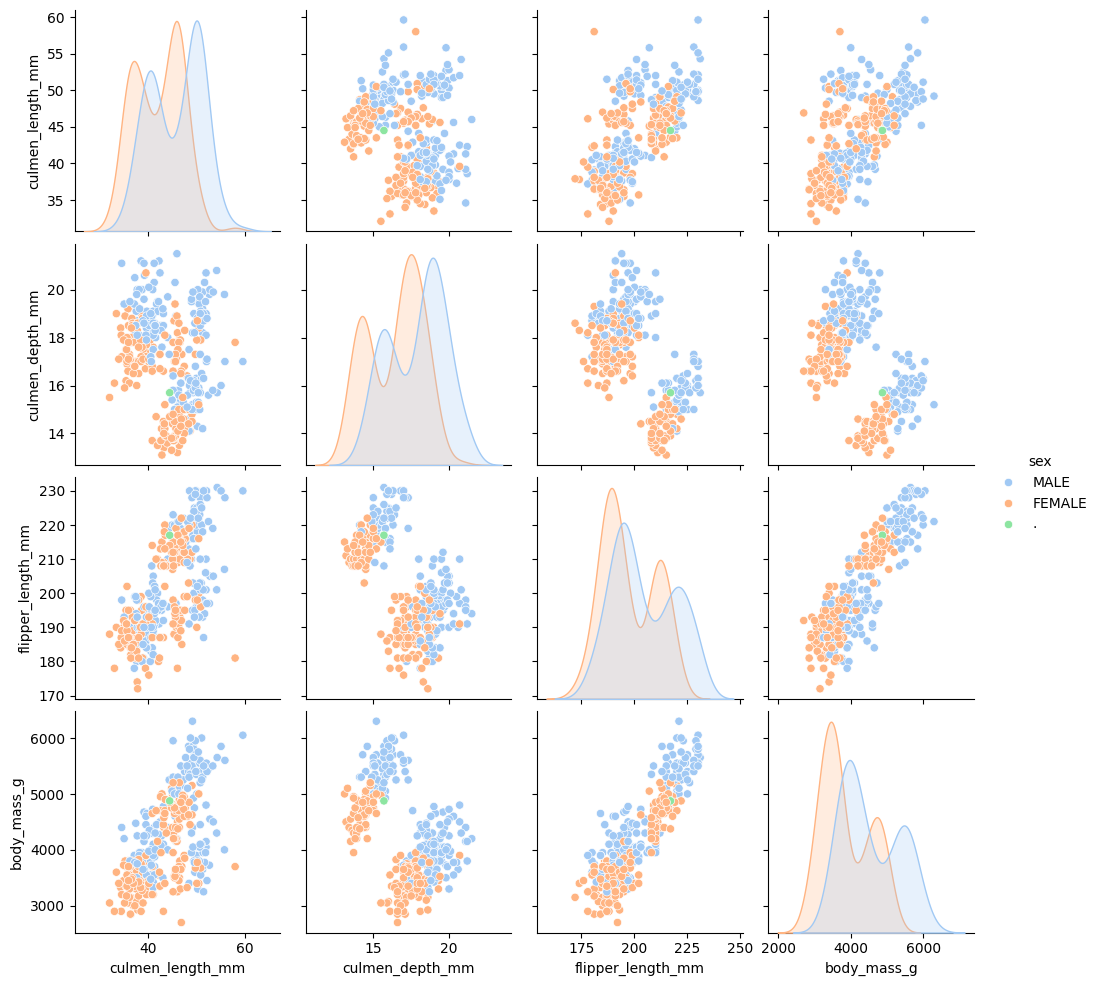

In [16]:
sns.pairplot(cleaned_penguins,hue='sex')
plt.show()

根据性别划分后可以看出，样本中雄性企鹅在各项属性数值方面大于雌性企鹅。